# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [3]:
import pandas as pd

from sklearn.cluster import KMeans

In [4]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [9]:
df = pd.read_csv('https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true')

Display the first 5 rows using `head()`. `(5 pts)`

In [10]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [12]:
print("Dataset shape:", df.shape)

Dataset shape: (200, 5)


Show summary statistics using `describe()`. `(5 pts)`

In [14]:
print("Summary Stats", df.describe)

Summary Stats <bound method NDFrame.describe of      CustomerID   Genre  Age  AnnualIncome  SpendingScore
0             1    Male   19            15             39
1             2    Male   21            15             81
2             3  Female   20            16              6
3             4  Female   23            16             77
4             5  Female   31            17             40
..          ...     ...  ...           ...            ...
195         196  Female   35           120             79
196         197  Female   45           126             28
197         198    Male   32           126             74
198         199    Male   32           137             18
199         200    Male   30           137             83

[200 rows x 5 columns]>


Check for missing values. `(5 pts)`

In [15]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 CustomerID       0
Genre            0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [18]:
selected_columns = ['AnnualIncome', 'SpendingScore']
df_subset = df[selected_columns]

Display the first 10 rows. `(5 pts)`

In [20]:
df_subset.head(10)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

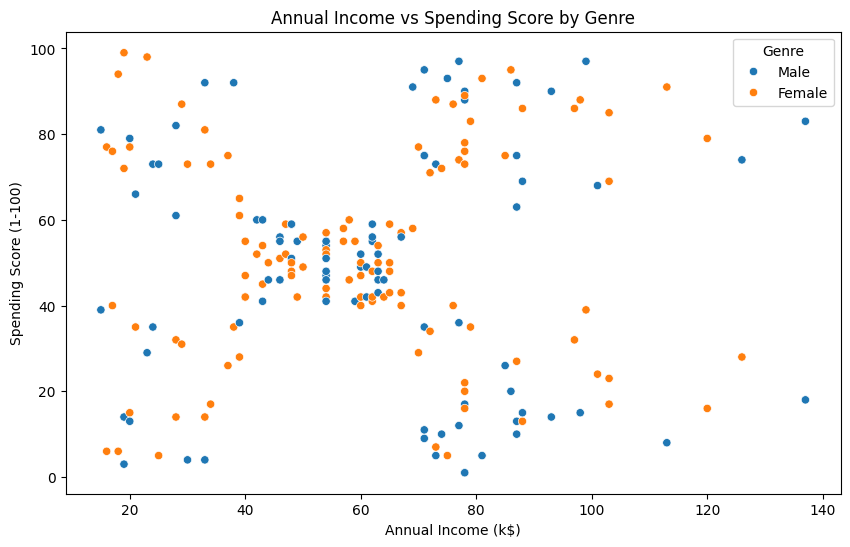

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Genre', data=df)
plt.title('Annual Income vs Spending Score by Genre')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

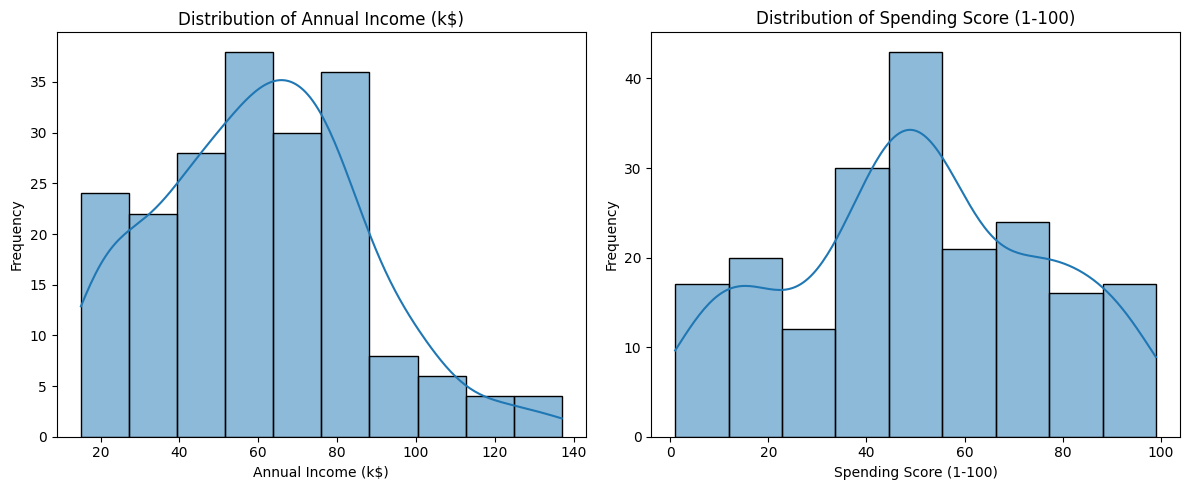

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df_subset['AnnualIncome'], kde=True)
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(df_subset['SpendingScore'], kde=True)
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

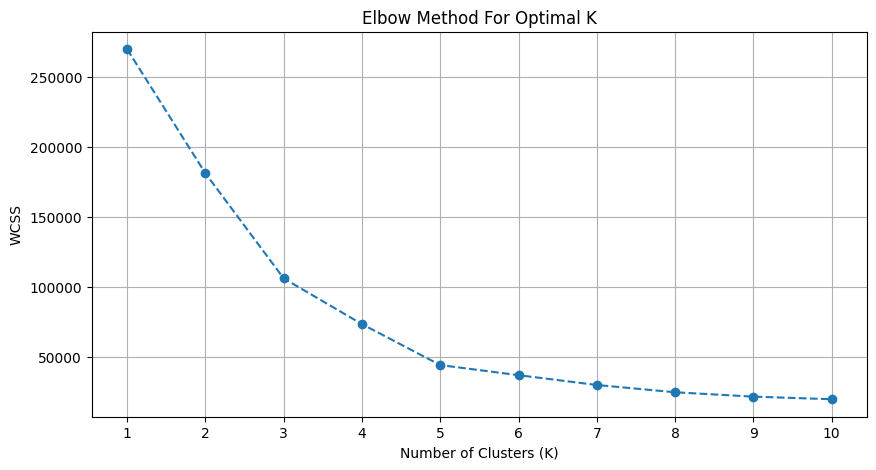

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_subset)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [24]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df_subset['Cluster'] = kmeans.fit_predict(df_subset)
df_subset.head(10)

/tmp/ipython-input-1532003718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Cluster'] = kmeans.fit_predict(df_subset)


,AnnualIncome,SpendingScore,Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
5,17,76,2
6,18,6,4
7,18,94,2
8,19,3,4
9,19,72,2


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

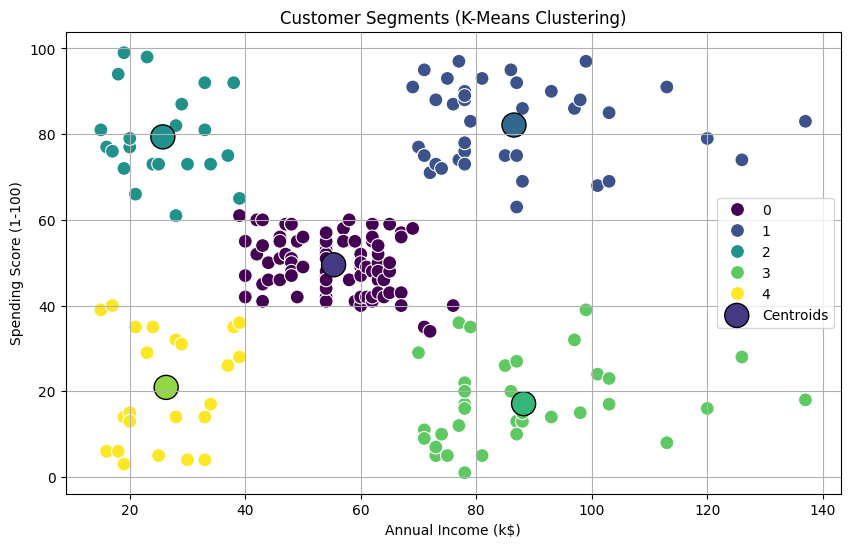

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df_subset, palette='viridis', s=100)

cluster_colors = sns.color_palette('viridis', n_colors=optimal_k)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300,
            c=cluster_colors,
            marker='o',
            edgecolor='black',
            linewidth=1,
            label='Centroids'
           )

plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
df_subset_with_age = df_subset.copy()
df_subset_with_age['Age'] = df['Age']

mean_age_per_cluster = df_subset_with_age.groupby('Cluster')['Age'].mean().reset_index()

print("Mean Age per Cluster:")
display(mean_age_per_cluster)

youngest_cluster_info = mean_age_per_cluster.loc[mean_age_per_cluster['Age'].idxmin()]

print(f"\nCluster with the youngest mean age: Cluster {youngest_cluster_info['Cluster']} with a mean age of {youngest_cluster_info['Age']:.2f}")

Mean Age per Cluster:


,Cluster,Age
0,0,42.716049
1,1,32.692308
2,2,25.272727
3,3,41.114286
4,4,45.217391



Cluster with the youngest mean age: Cluster 2.0 with a mean age of 25.27


## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users? <font color="green">**Cluster 3**</font>
- Which cluster represents low income, high spending users? <font color="00CEC8">**Cluster 2**</font>
- Which cluster might represent target customers for promotions? <font color="green">**Cluster 3.**</font>
- What business insights can you derive from the clusters?

Prioritizing <font color="green">Cluster 3</font> would be good for personalized promotions and outreach, potentially raising their spending score through promotions.

<font color="0047AB">Cluster 1</font> high spenders could be more likely to be informed because assuming from their high spending trait, their browsing algorithm would probably be more leaning towards the promotions than the low spenders, possibly tracking these promotions/sales themselves, same goes for <font color="00CEC8">Cluster 2</font>, which is the cluster with the youngest mean age(25.272) these younger individuals are more likely to be impulse buyers, prioritizing experience over saving. Double downing on them is not a bad move.

<font color="purple">Cluster 0</font> and <font color="yellow">Cluster 4</font> can be capitalized on by using loyalty incentives to build spending habit and essential value deals for initial engagements.


## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [37]:
df_3d = df[['Age', 'AnnualIncome', 'SpendingScore']]
df_3d.head()

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


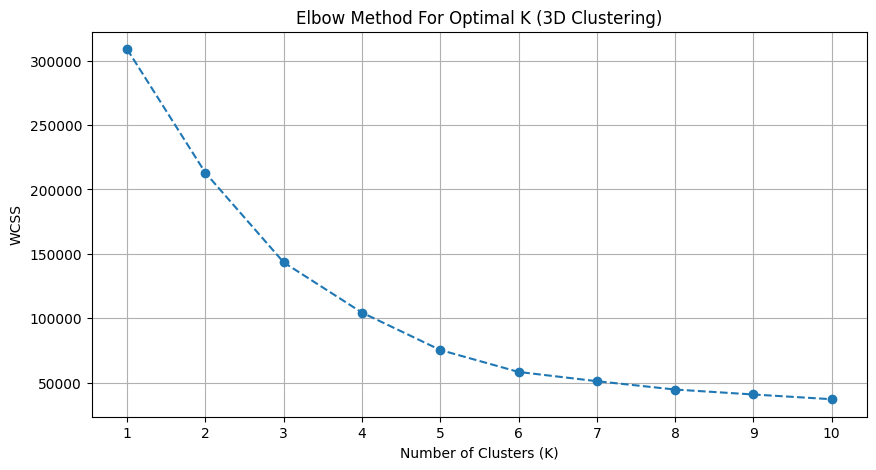

In [38]:
wcss_3d = []
for i in range(1, 11):
    kmeans_3d = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans_3d.fit(df_3d)
    wcss_3d.append(kmeans_3d.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_3d, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K (3D Clustering)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [46]:
optimal_k_3d = 6
kmeans_3d = KMeans(n_clusters=optimal_k_3d, init='k-means++', random_state=42, n_init=10)

features_for_fitting = df_3d[['Age', 'AnnualIncome', 'SpendingScore']]
df_3d['Cluster'] = kmeans_3d.fit_predict(features_for_fitting)
df_3d.head(10)

,Age,AnnualIncome,SpendingScore,Cluster
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5
5,22,17,76,2
6,35,18,6,5
7,23,18,94,2
8,64,19,3,5
9,30,19,72,2


Visualize using a 3D scatter plot. `(5 pts)`

In [47]:
import plotly.express as px

fig = px.scatter_3d(df_3d,
                    x='Age',
                    y='AnnualIncome',
                    z='SpendingScore',
                    color='Cluster',
                    symbol='Cluster',
                    title='Interactive 3D Customer Segments (K-Means Clustering)',
                    labels={'Age': 'Age',
                            'AnnualIncome': 'Annual Income (k$)',
                            'SpendingScore': 'Spending Score (1-100)'},
                    height=700
                   )

centroids_3d_df = pd.DataFrame(kmeans_3d.cluster_centers_, columns=['Age', 'AnnualIncome', 'SpendingScore'])
centroids_3d_df['Cluster'] = centroids_3d_df.index.astype(str)

fig.add_scatter3d(
    x=centroids_3d_df['Age'],
    y=centroids_3d_df['AnnualIncome'],
    z=centroids_3d_df['SpendingScore'],
    mode='markers',
    marker=dict(
        size=10,
        color='black',
        symbol='diamond'
    ),
    name='Centroids',
    showlegend=True
)

fig.update_layout(scene_camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)))
fig.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- **there meaningful and distinguishable clusters?**

Yes. The 3D model Identifies groups like young, high-spenders or older, low-spenders. Allowing for a personalized marketing based on age, income, and spending habits.



- **What business insights can you derive from the clusters in 3D?**

1.   Young, High-Income, High-Spending: (trendy, affluent youth)
2.   Older, High-Income, Low-Spending: (conservative, wealthy seniors)
3.   Young, Low-Income, High-Spending: (impulse-driven young adults)
4.   Mid-Aged, Mid-Income, Mid-Spending: (stable, average consumers)